# The correlation between inflation and energy consumption

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

#### Import and form the data

The first dataset is from another notebook. The second is from "https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=84575NED&_theme=123".

In [2]:
# Import the datasets (the energy consumption is till juni)
inflation_Netherlands = pd.read_excel("Inflationfile.xlsx", skiprows = [271, 272, 273], index_col = 0)
energy_consumption = pd.read_csv("MontlyEnergy.csv", index_col = 0)

#### Fast look at the data

In [3]:
# The energy inflation dataset
inflation_Netherlands.head()

,Jaar,Maand,CPI_energie,CPI_energie-100,CPI(afgeleid)_energie,CPI_algemeen,CPI(algemeen)_afgeleid,CPI_elektriciteit,CPI(elektriciteit)_afgeleid,CPI_gas,CPI(gas)_afgeleid,CPI_energiejaarlijks
Perioden,,,,,,,,,,,,
2000 januari,2000,januari,52.22,-47.78,65.20,73.55,77.17,69.63,78.38,43.70,57.67,9.3
2000 februari,2000,februari,52.29,-47.71,65.28,74.00,77.64,69.84,78.62,43.69,57.66,9.4
2000 maart,2000,maart,52.73,-47.27,65.84,74.66,78.33,71.36,80.33,43.62,57.56,10.3
2000 april,2000,april,52.74,-47.26,65.85,74.78,78.46,71.38,80.35,43.62,57.56,10.7
2000 mei,2000,mei,52.74,-47.26,65.85,75.02,78.69,71.38,80.35,43.62,57.56,10.7


In [4]:
# The energy consumption dataset
energy_consumption.head()

,ID,Perioden,NettoVerbruikBerekend_30
288,455,2000MM01,8847
289,456,2000MM02,8235
290,457,2000MM03,8738
291,459,2000MM04,7912
292,460,2000MM05,8221


#### Is there a correlation? 

Several calculations were done for the correlation between the datasets. Between 0-1 there is a positive correlation and from 0.8 there is a strong relationship. 

In [5]:
# Give the columns from the datasets names for the calculation
x = inflation_Netherlands['CPI_energie-100']
y = energy_consumption['NettoVerbruikBerekend_30']

In [6]:
# product-moment coefficent correlation
scipy.stats.pearsonr(x, y)

# Conclusion: positive correlation

(0.24623593490393975, 4.305298303410054e-05)

In [7]:
# Correlation with ranks

scipy.stats.spearmanr(x, y)

# Conclusion: positive correlation

SpearmanrResult(correlation=0.326329082365034, pvalue=4.0597878795283156e-08)

In [8]:
# Correlation with ranks

scipy.stats.kendalltau(x, y)

# Conclusion: positive correlation

KendalltauResult(correlation=0.2241437876454509, pvalue=4.239544628836012e-08)

In [9]:
# Correlation coeficent

np.corrcoef(x, y)

# Conclusion: positive correlation

array([[1.        , 0.24623593],
       [0.24623593, 1.        ]])

#### Visualise the correlation

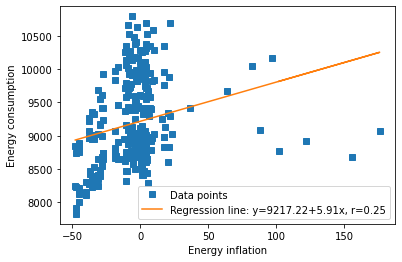

In [10]:
# Make a scatter plot (from: https://realpython.com/numpy-scipy-pandas-correlation-python/)

# Make a regression line from the Pearson correlation coefficient
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Relation between the regression line and the value of the correlation coefficient
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

# Make the plot
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Energy inflation')
ax.set_ylabel('Energy consumption')
ax.legend(facecolor='white')
plt.show()

#### Simple regression

In [11]:
# Reshape the arrays to 2D-arrays, because otherwise the model don't work
x = inflation_Netherlands['CPI_energie-100'].array.reshape(-1, 1)
y = energy_consumption['NettoVerbruikBerekend_30'].array.reshape(-1, 1)

In [12]:
# Make train and test sets for the model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [13]:
# Import the model
from sklearn.linear_model import LinearRegression

regressionmodel = LinearRegression()
regressionmodel.fit(x_train, y_train)
predictions = regressionmodel.predict(x_test)
predictions[:10]

array([[8905.10304425],
       [9296.43772591],
       [8996.36510578],
       [9258.02620915],
       [9255.34203087],
       [9276.07499413],
       [8839.84974469],
       [9001.82602021],
       [8969.06053362],
       [9101.32573231]])

In [14]:
# How good is the model? 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test,predictions)**(1/2))
print(r2_score(y_test,predictions))

# Conclusion: The model is very weak

649.400566898991
-0.41174290472564645
